In [1]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         pass

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pickle
import cv2
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.optimizers import Adam
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
np.random.seed(42)

In [4]:
df=pd.read_csv("/kaggle/input/indian-traffic-sign-dataset/Indian-Traffic Sign-Dataset/traffic_sign.csv")
df.set_index('ClassId')
df

,ClassId,Name
0,0,Give way
1,1,No entry
2,2,One-way traffic
3,3,One-way traffic
4,4,No vehicles in both directions
5,5,No entry for cycles
6,6,No entry for goods vehicles
7,7,No entry for pedestrians
8,8,No entry for bullock carts
9,9,No entry for hand carts


In [5]:
IMG_SIZE = 64
images = []
labels = []
path = "/kaggle/input/indian-traffic-sign-dataset/Indian-Traffic Sign-Dataset/Images"
print(len(os.listdir(path)))
for file in os.listdir(path):
    for image in os.listdir(path+'/'+str(file)):
        img =  cv2.imread(path+'/'+file+'/'+image)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        images.append(img)
        labels.append(file)

58


In [6]:
noOfClasses = len(df)
print(noOfClasses)

59


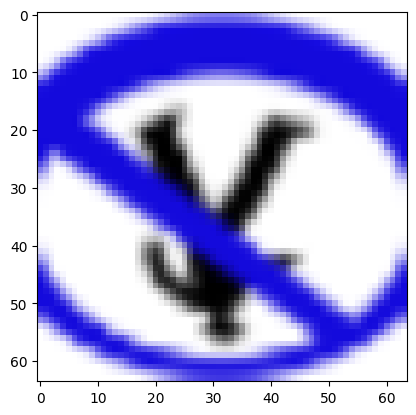

In [7]:
plt.imshow(images[0])

In [8]:
len(images)

13971

In [9]:
images = np.array(images)
labels = np.array(labels)

In [10]:
def grayScale(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return image

def equalizer(image):
    image = cv2.equalizeHist(image)
    return image

def preprocessing(image):
    image = grayScale(image)
    image = equalizer(image)
    image = image/255
    return image

In [11]:
X=images
Y=labels

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.2)

print("Train",end = "");print(X_train.shape,Y_train.shape)
print("Validation",end = "");print(X_validation.shape,Y_validation.shape)
print("Test",end = "");print(X_test.shape,Y_test.shape)

Train(8940, 64, 64, 3) (8940,)
Validation(2236, 64, 64, 3) (2236,)
Test(2795, 64, 64, 3) (2795,)


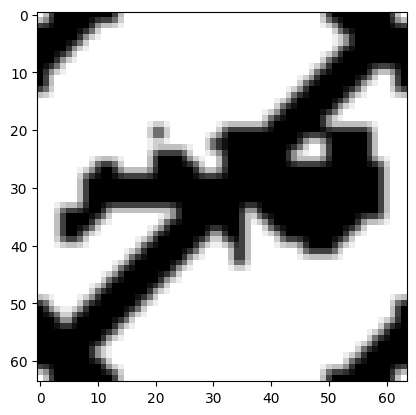

In [13]:
plt.imshow(X_train[0])

In [14]:
X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [15]:
print("Train",end = "");print(X_train.shape,Y_train.shape)
print("Validation",end = "");print(X_validation.shape,Y_validation.shape)
print("Test",end = "");print(X_test.shape,Y_test.shape)

Train(8940, 64, 64) (8940,)
Validation(2236, 64, 64) (2236,)
Test(2795, 64, 64) (2795,)


In [16]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [17]:
print("Train",end = "");print(X_train.shape,Y_train.shape)
print("Validation",end = "");print(X_validation.shape,Y_validation.shape)
print("Test",end = "");print(X_test.shape,Y_test.shape)

Train(8940, 64, 64, 1) (8940,)
Validation(2236, 64, 64, 1) (2236,)
Test(2795, 64, 64, 1) (2795,)


In [18]:
Y_train=np.float32(Y_train)
Y_validation=np.float32(Y_validation)
Y_test=np.float32(Y_test)

In [19]:
print("Train",end = "");print(X_train.shape,Y_train.shape)
print("Validation",end = "");print(X_validation.shape,Y_validation.shape)
print("Test",end = "");print(X_test.shape,Y_test.shape)

Train(8940, 64, 64, 1) (8940,)
Validation(2236, 64, 64, 1) (2236,)
Test(2795, 64, 64, 1) (2795,)


In [20]:
X_train[0]

array([[[1.        ],
        [0.21176471],
        [0.12156863],
        ...,
        [0.12156863],
        [0.21176471],
        [1.        ]],

       [[0.21176471],
        [0.17254902],
        [0.08235294],
        ...,
        [0.08235294],
        [0.17254902],
        [0.21176471]],

       [[0.12156863],
        [0.08235294],
        [0.02745098],
        ...,
        [0.02745098],
        [0.08235294],
        [0.12156863]],

       ...,

       [[0.12156863],
        [0.08235294],
        [0.02745098],
        ...,
        [0.02745098],
        [0.08235294],
        [0.12156863]],

       [[0.21176471],
        [0.17254902],
        [0.08235294],
        ...,
        [0.08235294],
        [0.17254902],
        [0.21176471]],

       [[1.        ],
        [0.21176471],
        [0.12156863],
        ...,
        [0.12156863],
        [0.21176471],
        [1.        ]]])

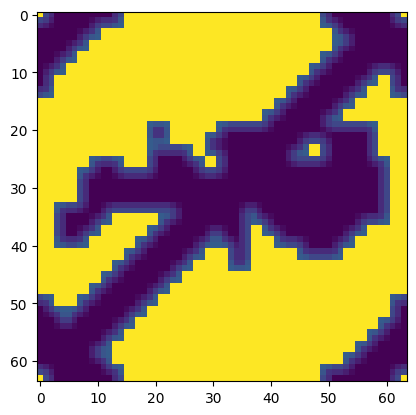

In [21]:
plt.imshow(X_train[0])

In [22]:
Y_train[0]

8.0

In [23]:
def Model():
    model = Sequential()
    model.add((Conv2D(64,(5,5),input_shape=X_train.shape[1:],activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(64, (5,5), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))
    model.add((Conv2D(32, (3,3),activation='relu')))
    model.add((Conv2D(32, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(200,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(noOfClasses,activation='softmax')) 
    model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
    return model

In [24]:
model = Model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                        

In [25]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [26]:
history=model.fit(datagen.flow(X_train, Y_train, batch_size=32),steps_per_epoch=len(X_train)//32,epochs=32,shuffle=1,validation_data=(X_validation,Y_validation))

Epoch 1/32


2024-01-25 12:46:56.346006: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


279/279 [==============================] - 13s 25ms/step - loss: 3.1957 - accuracy: 0.1988 - val_loss: 2.0234 - val_accuracy: 0.4329
Epoch 2/32
279/279 [==============================] - 6s 22ms/step - loss: 1.7937 - accuracy: 0.4719 - val_loss: 1.1564 - val_accuracy: 0.6324
Epoch 3/32
279/279 [==============================] - 6s 22ms/step - loss: 1.2628 - accuracy: 0.6166 - val_loss: 0.8911 - val_accuracy: 0.7178
Epoch 4/32
279/279 [==============================] - 6s 22ms/step - loss: 1.0097 - accuracy: 0.6817 - val_loss: 0.6975 - val_accuracy: 0.7862
Epoch 5/32
279/279 [==============================] - 6s 22ms/step - loss: 0.8622 - accuracy: 0.7240 - val_loss: 0.6228 - val_accuracy: 0.7938
Epoch 6/32
279/279 [==============================] - 6s 22ms/step - loss: 0.7683 - accuracy: 0.7511 - val_loss: 0.6041 - val_accuracy: 0.7880
Epoch 7/32
279/279 [==============================] - 6s 22ms/step - loss: 0.6851 - accuracy: 0.7737 - val_loss: 0.5151 - val_accuracy: 0.8278
Epoch 8/3

In [27]:
score =model.evaluate(X_test,Y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])


Test Score: 0.34444135427474976
Test Accuracy: 0.8790697455406189


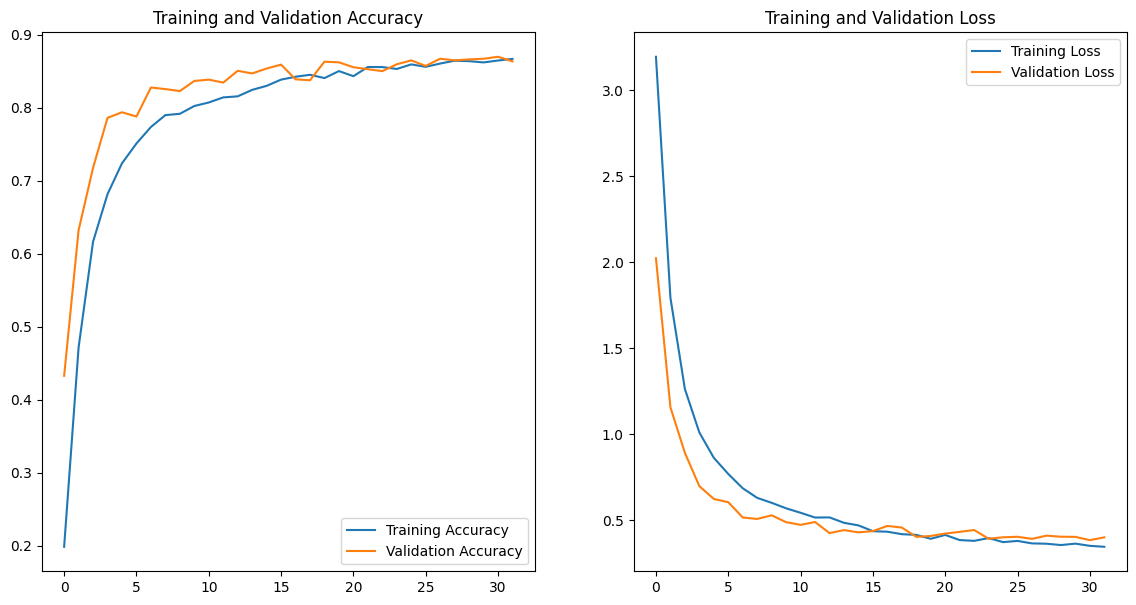

In [28]:
def plot_model_loss_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(32)

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_model_loss_curves(history=history)

In [29]:
Y_preds=model.predict(X_test)
Y_preds=np.argmax(Y_preds,axis=1)
Y_preds

88/88 [==============================] - 1s 5ms/step


array([23,  4, 17, ..., 33, 45, 24])

In [30]:
model.save('final.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
